In [1]:
# データ加工・可視化用ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# 学習データの読み込み
dir_path = "/content/drive/MyDrive/ColabDB/AustraliaWeather/"
train_df = pd.read_csv(dir_path + "train.csv")
test_df = pd.read_csv(dir_path + "test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
## データの中身理解
train_df.head()

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,train_00000,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,train_00001,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,train_00002,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
3,train_00003,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
4,train_00004,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No


In [4]:
print("学習データの大きさ" , train_df.shape )
print("評価データの大きさ" , test_df.shape )

学習データの大きさ (84359, 24)
評価データの大きさ (28193, 23)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84359 entries, 0 to 84358
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             84359 non-null  object 
 1   Date           84359 non-null  object 
 2   Location       84359 non-null  object 
 3   MinTemp        84075 non-null  float64
 4   MaxTemp        84178 non-null  float64
 5   Rainfall       84359 non-null  float64
 6   Evaporation    48599 non-null  float64
 7   Sunshine       44347 non-null  float64
 8   WindGustDir    78846 non-null  object 
 9   WindGustSpeed  78883 non-null  float64
 10  WindDir9am     78571 non-null  object 
 11  WindDir3pm     82141 non-null  object 
 12  WindSpeed9am   83713 non-null  float64
 13  WindSpeed3pm   82843 non-null  float64
 14  Humidity9am    83444 non-null  float64
 15  Humidity3pm    82292 non-null  float64
 16  Pressure9am    76110 non-null  float64
 17  Pressure3pm    76098 non-null  float64
 18  Cloud9

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28193 entries, 0 to 28192
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             28193 non-null  object 
 1   Date           28193 non-null  object 
 2   Location       28193 non-null  object 
 3   MinTemp        28102 non-null  float64
 4   MaxTemp        28128 non-null  float64
 5   Rainfall       28193 non-null  float64
 6   Evaporation    16245 non-null  float64
 7   Sunshine       14794 non-null  float64
 8   WindGustDir    26377 non-null  object 
 9   WindGustSpeed  26388 non-null  float64
 10  WindDir9am     26273 non-null  object 
 11  WindDir3pm     27476 non-null  object 
 12  WindSpeed9am   27990 non-null  float64
 13  WindSpeed3pm   27690 non-null  float64
 14  Humidity9am    27891 non-null  float64
 15  Humidity3pm    27478 non-null  float64
 16  Pressure9am    25450 non-null  float64
 17  Pressure3pm    25443 non-null  float64
 18  Cloud9

In [7]:
train_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,84075.000000,84178.000000,84359.000000,48599.000000,44347.000000,78883.000000,83713.000000,82843.000000,83444.000000,82292.000000,76110.000000,76098.000000,52826.000000,50746.000000,83961.000000,82807.000000
mean,12.185245,23.248617,2.324496,5.484098,7.655923,40.032504,14.000358,18.673587,68.709194,51.358771,1017.625354,1015.237378,4.417332,4.484294,16.993633,21.703236
std,6.402816,7.125196,8.320730,4.201555,3.767285,13.652409,8.905390,8.826885,19.019853,20.769290,7.149958,7.089172,2.884603,2.717326,6.500955,6.944862
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,982.000000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,5.000000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.300000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.500000
max,33.900000,48.100000,371.000000,145.000000,14.200000,135.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1038.500000,9.000000,8.000000,38.900000,46.700000


In [8]:
train_df.isnull().sum()

,0
id,0
Date,0
Location,0
MinTemp,284
MaxTemp,181
Rainfall,0
Evaporation,35760
Sunshine,40012
WindGustDir,5513
WindGustSpeed,5476


In [9]:
test_df.isnull().sum()

,0
id,0
Date,0
Location,0
MinTemp,91
MaxTemp,65
Rainfall,0
Evaporation,11948
Sunshine,13399
WindGustDir,1816
WindGustSpeed,1805


In [10]:
tmp = train_df.groupby("Location")["id"].count()

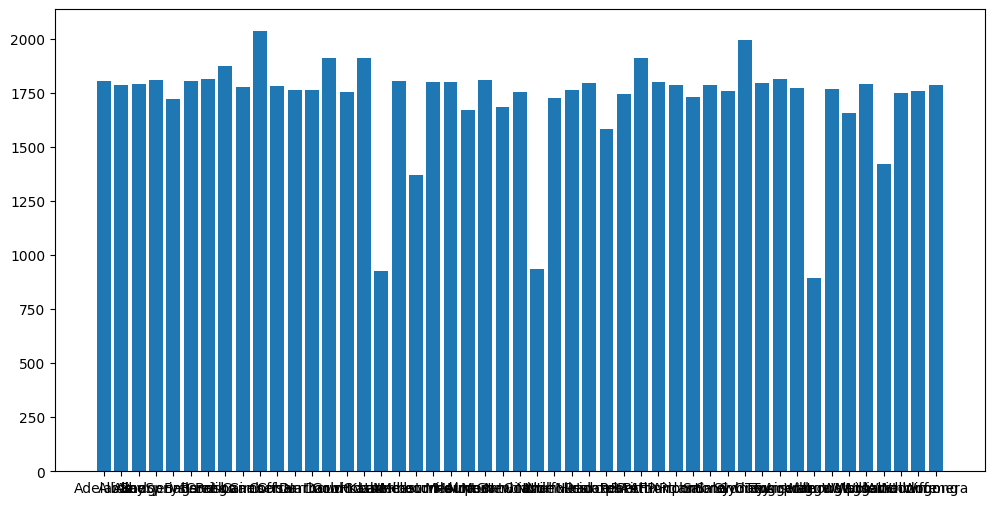

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(tmp.index, tmp.values)
plt.show()

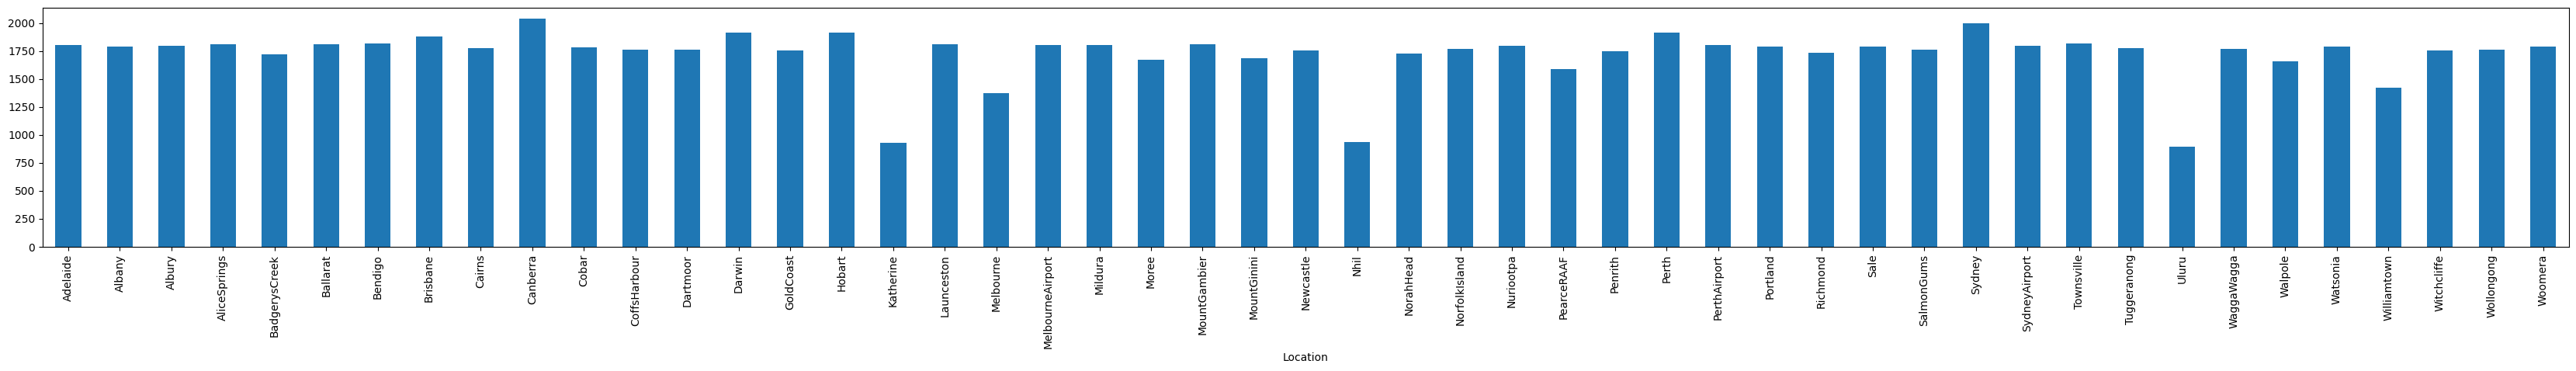

In [12]:
tmp.plot(kind='bar', figsize=(42, 4))
pass

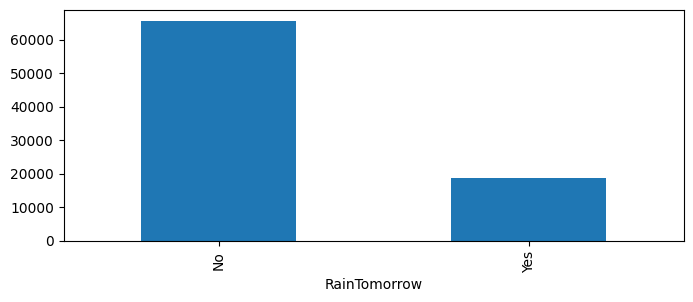

In [14]:
tmp2 = train_df.groupby("RainTomorrow")["id"].count()
tmp2.plot(kind='bar', figsize=(8, 3))
pass

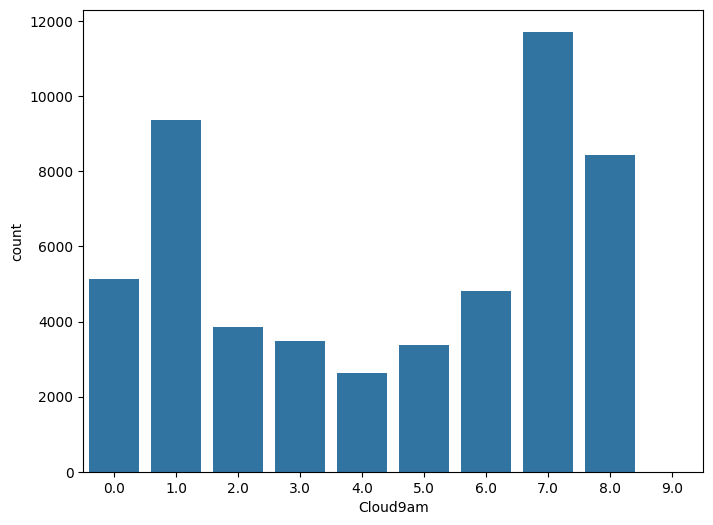

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x="Cloud9am")
plt.show()

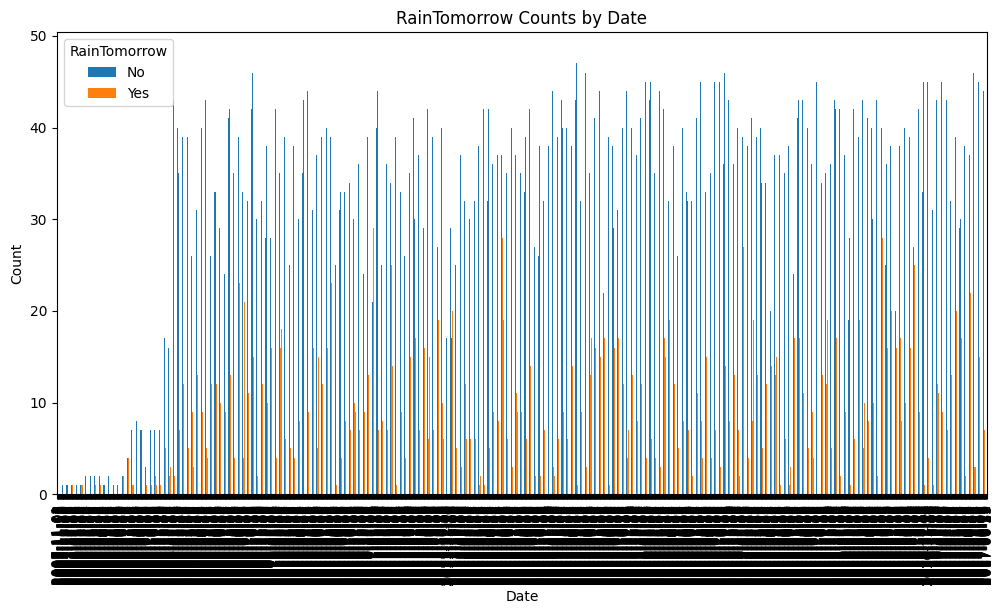

In [16]:
# Group data by 'Date' and count 'RainTomorrow' occurrences
daily_counts = train_df.groupby('Date')['RainTomorrow'].value_counts().unstack(fill_value=0)

# Create a bar plot
daily_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('RainTomorrow Counts by Date')
plt.legend(title='RainTomorrow')
plt.show()
pass

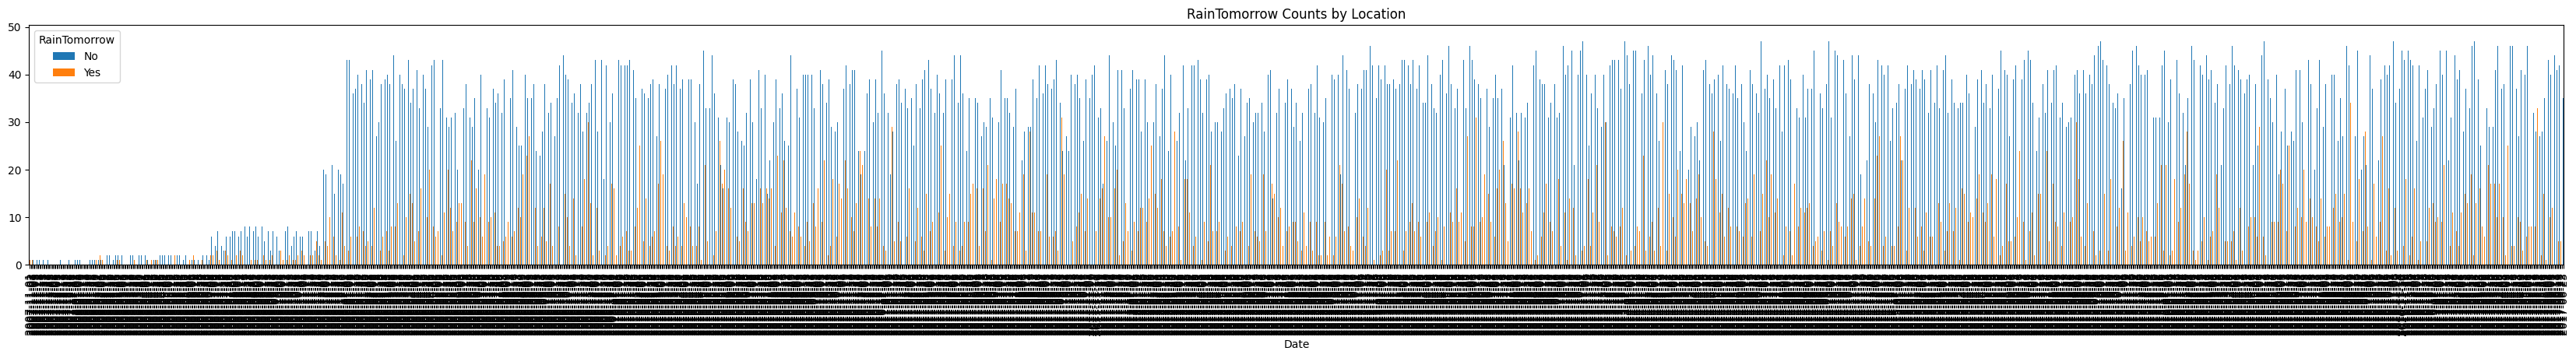

In [ ]:
# Group data by 'Location' and count 'RainTomorrow' occurrences
local_counts = train_df.groupby('Location')['RainTomorrow'].value_counts().unstack(fill_value=0)

# Create a bar plot
daily_counts.plot(kind='bar', figsize=(42, 4))
# plt.xlabel('Location')
# plt.ylabel('Count')
plt.title('RainTomorrow Counts by Location')
plt.legend(title='RainTomorrow')
plt.show()

In [19]:
## 学習用データと評価用データを縦結合する（評価用は「RainTomorrow」がNULL）
df = pd.concat([train_df, test_df], ignore_index=True)

In [20]:
df.shape

(112552, 24)

In [22]:
df.tail(2)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
112550,test_28191,2017-06-15,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,...,59.0,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,NaN
112551,test_28192,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,NaN


In [23]:
## データ加工（特徴量エンジニアリング）データフレーム＝df2

'''
特徴量として、以下を採用したものをdf2と定義する
Date、Location、MinTemp、MaxTemp、Rainfall、
WindSpeed3pm、Humidity3pm、Pressure3pm、RainToday、RainTomorrow
'''
df2 = df.drop(
    columns=['Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
             'Humidity9am', 'Pressure9am', 'Cloud9am' ,'Cloud3pm', 'Temp9am', 'Temp3pm']
    )

In [24]:
df2.head(2)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,train_00000,2008-12-01,Albury,13.4,22.9,0.6,24.0,22.0,1007.1,No,No
1,train_00001,2008-12-02,Albury,7.4,25.1,0.0,22.0,25.0,1007.8,No,No


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112552 entries, 0 to 112551
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            112552 non-null  object 
 1   Date          112552 non-null  object 
 2   Location      112552 non-null  object 
 3   MinTemp       112177 non-null  float64
 4   MaxTemp       112306 non-null  float64
 5   Rainfall      112552 non-null  float64
 6   WindSpeed3pm  110533 non-null  float64
 7   Humidity3pm   109770 non-null  float64
 8   Pressure3pm   101541 non-null  float64
 9   RainToday     112552 non-null  object 
 10  RainTomorrow  84359 non-null   object 
dtypes: float64(6), object(5)
memory usage: 9.4+ MB


In [26]:
# Dateの数値型変換（MMDD)
from datetime import datetime
df2['Date'] = pd.to_datetime(df2['Date'])  # Convert 'Date' column to datetime
df2['int_Date'] = df2['Date'].dt.month * 100 + df2['Date'].dt.day

In [27]:
df2.head(2)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date
0,train_00000,2008-12-01,Albury,13.4,22.9,0.6,24.0,22.0,1007.1,No,No,1201
1,train_00001,2008-12-02,Albury,7.4,25.1,0.0,22.0,25.0,1007.8,No,No,1202


In [28]:
# object型のDate列を削除
df2 = df2.drop(columns=['Date'])

In [33]:
# boolean型のRainTodayとRainTomorrowを「0,1」のint型に変更
df2['RainToday'] = df2['RainToday'].map({'Yes': 1, 'No': 0})
df2['RainTomorrow'] = df2['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [34]:
df2.head(2)

,id,Location,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date
0,train_00000,Albury,13.4,22.9,0.6,24.0,22.0,1007.1,0,0.0,1201
1,train_00001,Albury,7.4,25.1,0.0,22.0,25.0,1007.8,0,0.0,1202


In [35]:
df2.isnull().sum()

,0
id,0
Location,0
MinTemp,375
MaxTemp,246
Rainfall,0
WindSpeed3pm,2019
Humidity3pm,2782
Pressure3pm,11011
RainToday,0
RainTomorrow,28193


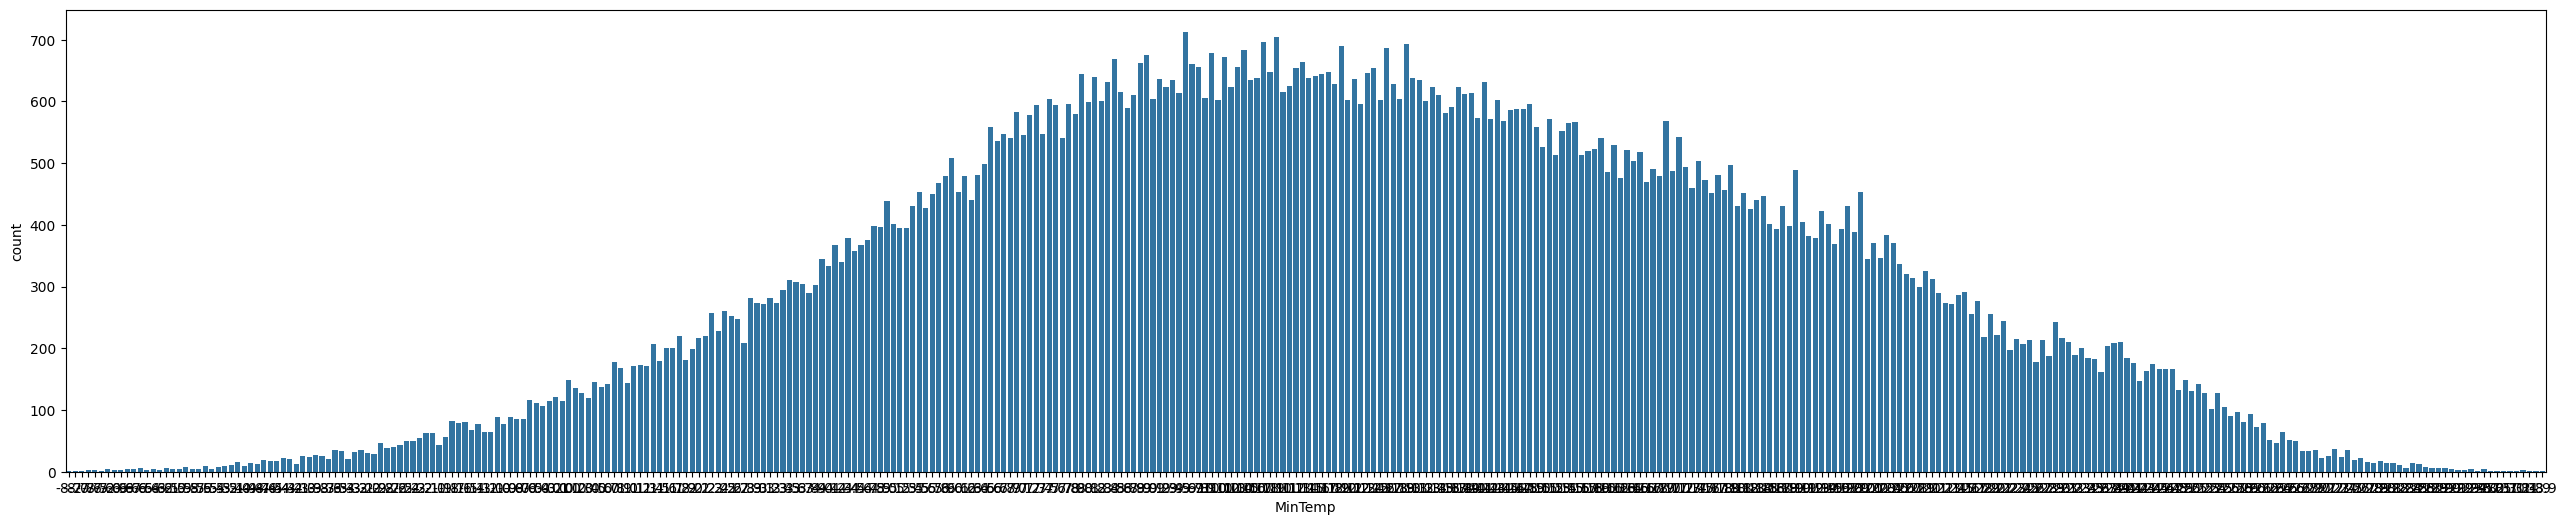

In [31]:
# MinTempの値の特徴を確認し、欠損値を保管する
plt.figure(figsize=(32,6))
sns.countplot(data=df2, x="MinTemp")
plt.show()

<ipython-input-32-6cc305c7fe1b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="MaxTemp", y="MinTemp", data=df2, ci=None)


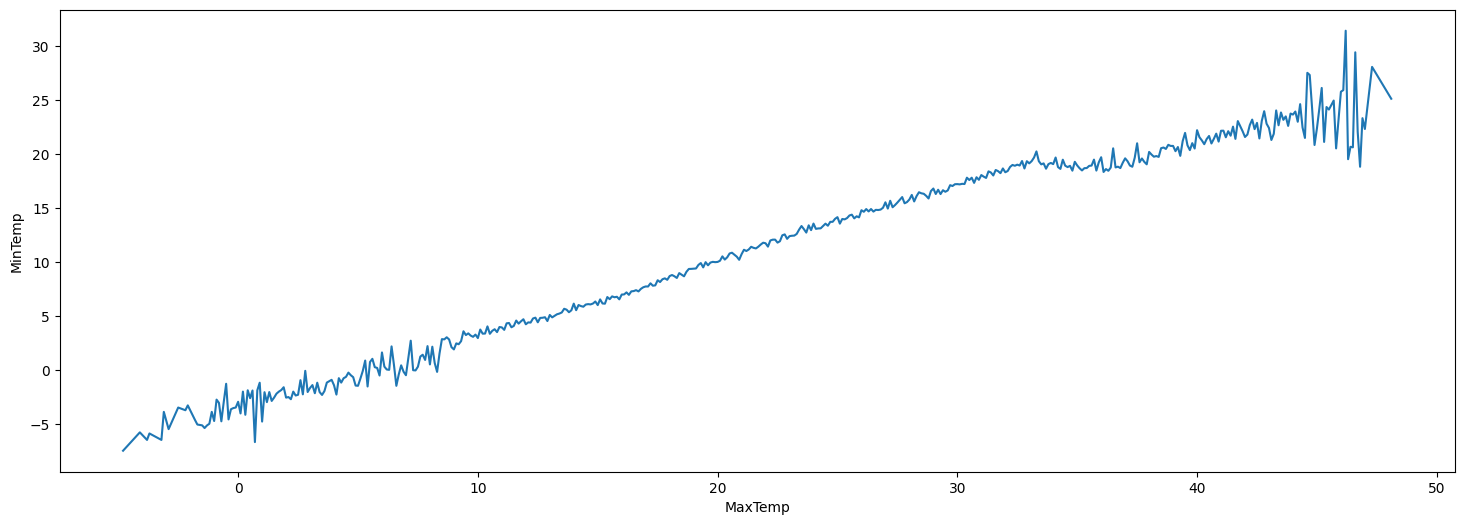

In [32]:
plt.figure(figsize=(18,6))
sns.lineplot(x="MaxTemp", y="MinTemp", data=df2, ci=None)
plt.show()

In [36]:
# 欠損値の保管前のdf2をコピーして、df2_1を作成する
df2_1 = df2.copy()

In [37]:
df2_1.head(2)

,id,Location,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date
0,train_00000,Albury,13.4,22.9,0.6,24.0,22.0,1007.1,0,0.0,1201
1,train_00001,Albury,7.4,25.1,0.0,22.0,25.0,1007.8,0,0.0,1202


In [38]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112552 entries, 0 to 112551
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            112552 non-null  object 
 1   Location      112552 non-null  object 
 2   MinTemp       112177 non-null  float64
 3   MaxTemp       112306 non-null  float64
 4   Rainfall      112552 non-null  float64
 5   WindSpeed3pm  110533 non-null  float64
 6   Humidity3pm   109770 non-null  float64
 7   Pressure3pm   101541 non-null  float64
 8   RainToday     112552 non-null  int64  
 9   RainTomorrow  84359 non-null   float64
 10  int_Date      112552 non-null  int32  
dtypes: float64(7), int32(1), int64(1), object(2)
memory usage: 9.0+ MB


In [39]:
# MinTempはMaxTempと相関があったため、MaxTemp-10度として欠損地を保管する
df2_1['MinTemp'] = df2_1['MinTemp'].fillna(df2_1['MaxTemp']-10)

In [40]:
df2_1.isnull().sum()

,0
id,0
Location,0
MinTemp,58
MaxTemp,246
Rainfall,0
WindSpeed3pm,2019
Humidity3pm,2782
Pressure3pm,11011
RainToday,0
RainTomorrow,28193


In [41]:
# MaxTempはMinTempと相関があったため、MinTemp+10度として欠損地を保管する
df2_1['MaxTemp'] = df2_1['MaxTemp'].fillna(df2_1['MinTemp']+10)

In [42]:
df2_1.isnull().sum()

,0
id,0
Location,0
MinTemp,58
MaxTemp,58
Rainfall,0
WindSpeed3pm,2019
Humidity3pm,2782
Pressure3pm,11011
RainToday,0
RainTomorrow,28193


In [43]:
# 残りのMaxTempとMinTempの欠損地は平均値で保管する
df2_1['MaxTemp'] = df2_1['MaxTemp'].fillna(df2_1['MaxTemp'].mean())
df2_1['MinTemp'] = df2_1['MinTemp'].fillna(df2_1['MinTemp'].mean())

In [45]:
df2_1.isnull().sum()

,0
id,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindSpeed3pm,2019
Humidity3pm,2782
Pressure3pm,11011
RainToday,0
RainTomorrow,28193


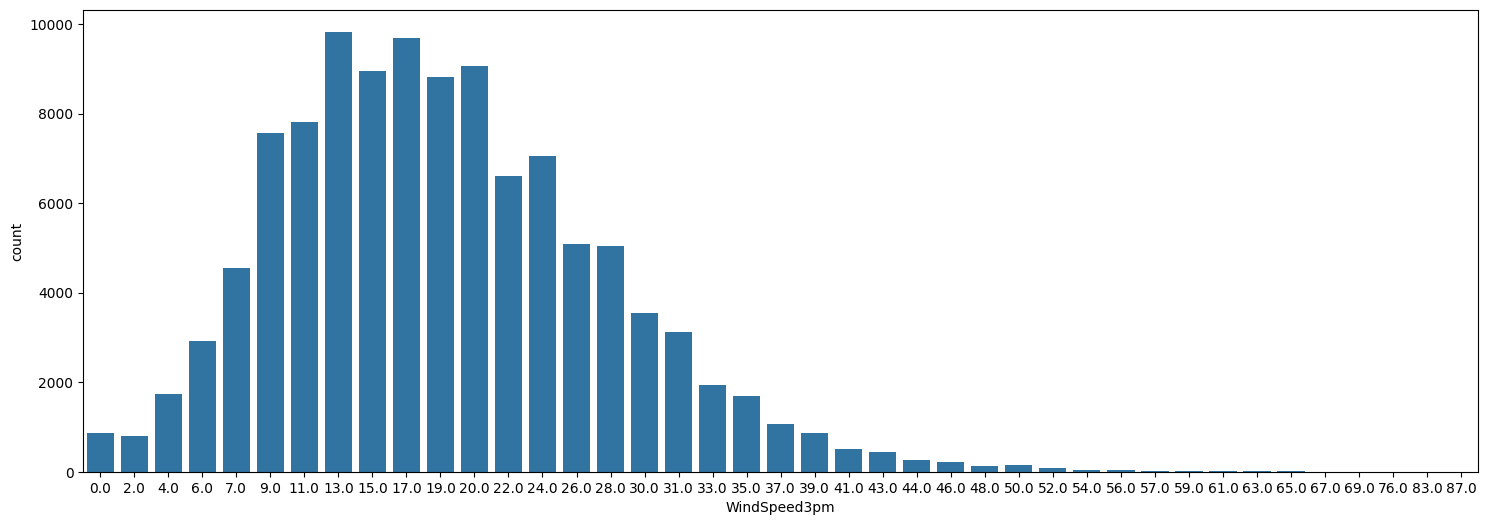

In [46]:
# WindSpeed3pmの値の分布を確認する
plt.figure(figsize=(18,6))
sns.countplot(data=df2_1, x="WindSpeed3pm")
plt.show()

In [47]:
print(df2_1['WindSpeed3pm'].mean())
print(df2_1['WindSpeed3pm'].median())

18.664254114155952
19.0


In [48]:
df2_1.describe()

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date
count,112552.000000,112552.000000,112552.000000,110533.000000,109770.000000,101541.000000,112552.000000,84359.000000,112552.000000
mean,12.196654,23.248762,2.340120,18.664254,51.400574,1015.237912,0.222804,0.221885,656.954350
std,6.400038,7.118433,8.415292,8.801353,20.814613,7.053426,0.416129,0.415517,342.889518
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,101.000000
25%,7.600000,17.900000,0.000000,13.000000,36.000000,1010.400000,0.000000,0.000000,330.000000
50%,12.000000,22.700000,0.000000,19.000000,52.000000,1015.200000,0.000000,0.000000,625.000000
75%,16.900000,28.300000,0.800000,24.000000,66.000000,1020.000000,0.000000,0.000000,927.000000
max,33.900000,48.100000,371.000000,87.000000,100.000000,1039.600000,1.000000,1.000000,1231.000000


In [49]:
# WindSpeed3pm は平均値で補完
df2_1['WindSpeed3pm'] = df2_1['WindSpeed3pm'].fillna(df2_1['WindSpeed3pm'].mean())

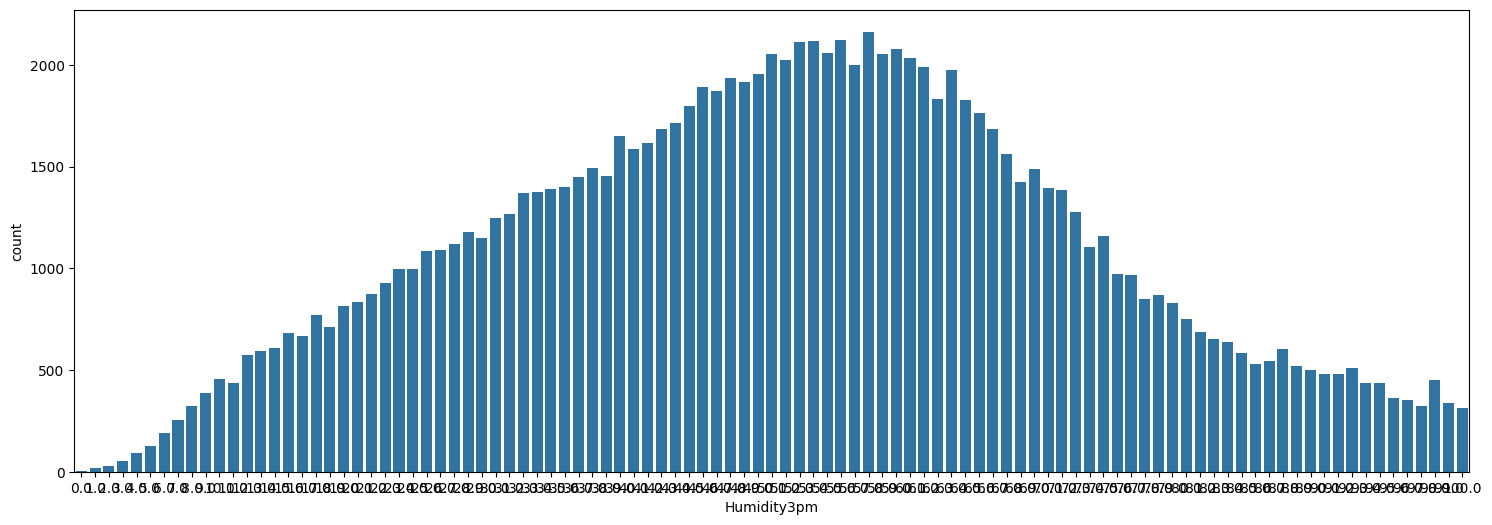

In [50]:
# Humidity3pmの値の分布を確認する
plt.figure(figsize=(18,6))
sns.countplot(data=df2_1, x="Humidity3pm")
plt.show()

<ipython-input-53-4cc4ade9a286>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="MaxTemp", y="Humidity3pm", data=df2_1, ci=None)


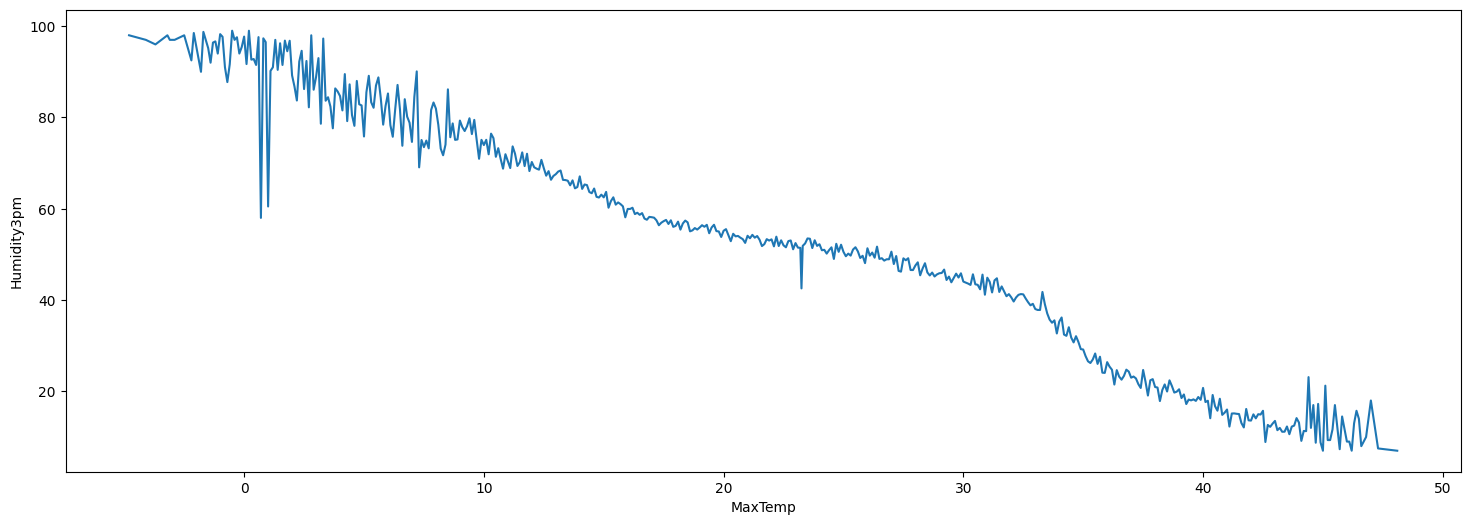

In [53]:
plt.figure(figsize=(18,6))
sns.lineplot(x="MaxTemp", y="Humidity3pm", data=df2_1, ci=None)
plt.show()

In [54]:
print(df2_1['Humidity3pm'].mean())
print(df2_1['Humidity3pm'].median())

51.40057392730254
52.0


In [55]:
# Humidity3pm は平均値で補完
df2_1['Humidity3pm'] = df2_1['Humidity3pm'].fillna(df2_1['Humidity3pm'].mean())

In [56]:
# Pressure3pmの値を確認
print(df2_1['Pressure3pm'].mean())
print(df2_1['Pressure3pm'].median())

1015.2379117006924
1015.2


In [57]:
df2_1.isnull().sum()

,0
id,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindSpeed3pm,0
Humidity3pm,0
Pressure3pm,11011
RainToday,0
RainTomorrow,28193


In [58]:
df.isnull().sum()

,0
id,0
Date,0
Location,0
MinTemp,375
MaxTemp,246
Rainfall,0
Evaporation,47708
Sunshine,53411
WindGustDir,7329
WindGustSpeed,7281


<ipython-input-59-ea045bbe1883>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Humidity3pm", y="Pressure3pm", data=df2_1, ci=None)


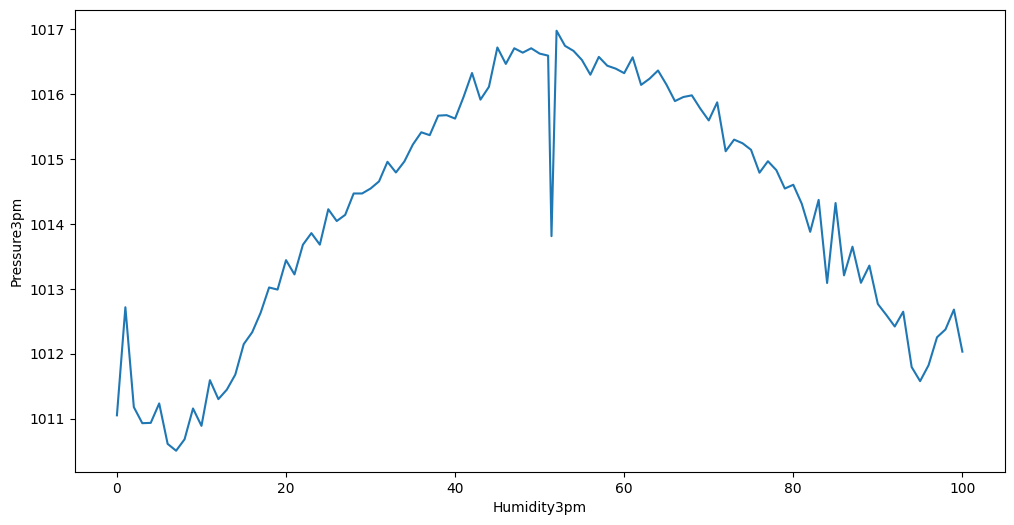

In [59]:
# 湿度と気圧の関係を確認する
plt.figure(figsize=(12,6))
sns.lineplot(x="Humidity3pm", y="Pressure3pm", data=df2_1, ci=None)
plt.show()

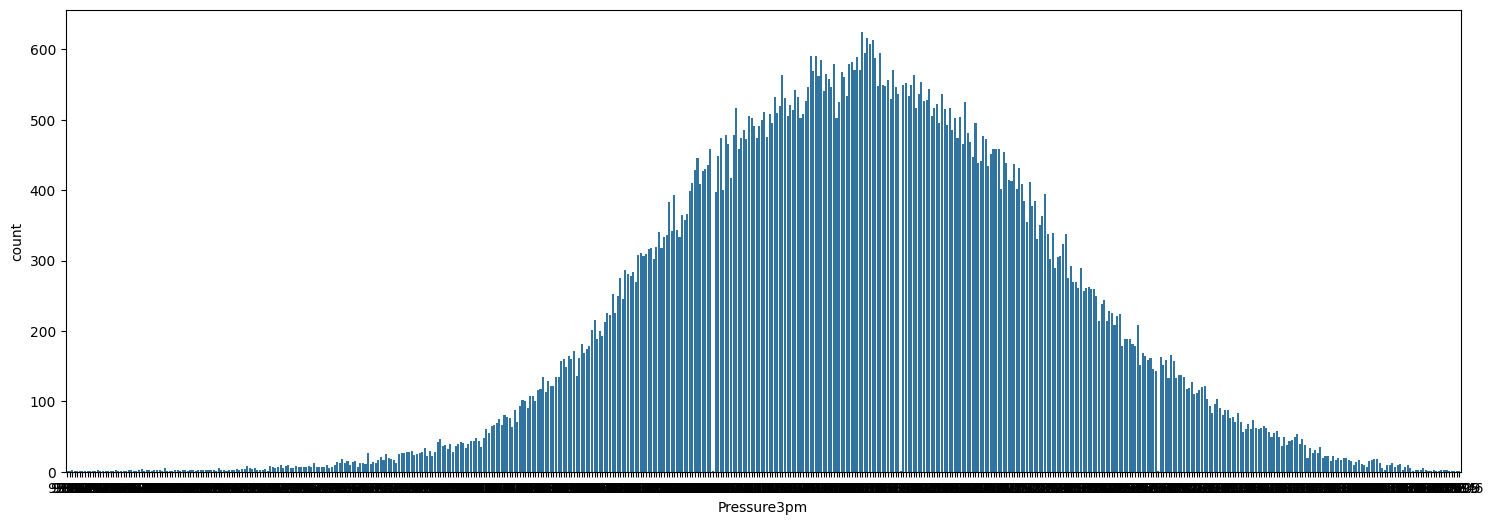

In [60]:
# Pressure3pmの値の分布を確認する
plt.figure(figsize=(18,6))
sns.countplot(data=df2_1, x="Pressure3pm")
plt.show()

In [61]:
# Pressure3pmは中央値で補完（欠損値の数が多いのでやや不安）
df2_1['Pressure3pm'] = df2_1['Pressure3pm'].fillna(df2_1['Pressure3pm'].median())

In [62]:
df2_1.isnull().sum()

,0
id,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindSpeed3pm,0
Humidity3pm,0
Pressure3pm,0
RainToday,0
RainTomorrow,28193


In [63]:
df2_1.head()

,id,Location,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date
0,train_00000,Albury,13.4,22.9,0.6,24.0,22.0,1007.1,0,0.0,1201
1,train_00001,Albury,7.4,25.1,0.0,22.0,25.0,1007.8,0,0.0,1202
2,train_00002,Albury,17.5,32.3,1.0,20.0,33.0,1006.0,0,0.0,1205
3,train_00003,Albury,14.6,29.7,0.2,24.0,23.0,1005.4,0,0.0,1206
4,train_00004,Albury,14.3,25.0,0.0,24.0,19.0,1008.2,0,0.0,1207


In [64]:
df2_1.tail()

,id,Location,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date
112547,test_28188,Uluru,5.4,20.5,0.0,28.0,32.0,1025.3,0,NaN,531
112548,test_28189,Uluru,4.9,20.7,0.0,24.0,11.0,1023.9,0,NaN,605
112549,test_28190,Uluru,3.2,18.6,0.0,20.0,29.0,1027.2,0,NaN,610
112550,test_28191,Uluru,2.6,22.5,0.0,7.0,24.0,1021.4,0,NaN,615
112551,test_28192,Uluru,3.5,21.8,0.0,13.0,27.0,1021.2,0,NaN,620


In [65]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112552 entries, 0 to 112551
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            112552 non-null  object 
 1   Location      112552 non-null  object 
 2   MinTemp       112552 non-null  float64
 3   MaxTemp       112552 non-null  float64
 4   Rainfall      112552 non-null  float64
 5   WindSpeed3pm  112552 non-null  float64
 6   Humidity3pm   112552 non-null  float64
 7   Pressure3pm   112552 non-null  float64
 8   RainToday     112552 non-null  int64  
 9   RainTomorrow  84359 non-null   float64
 10  int_Date      112552 non-null  int32  
dtypes: float64(7), int32(1), int64(1), object(2)
memory usage: 9.0+ MB


In [68]:
# object型のLocationをワンホットエンコーディングでint型に変更
ohe_Lo = pd.get_dummies(df2_1['Location'], dtype=int, prefix='Lo')
ohe_Lo.head()

,Lo_Adelaide,Lo_Albany,Lo_Albury,Lo_AliceSprings,Lo_BadgerysCreek,Lo_Ballarat,Lo_Bendigo,Lo_Brisbane,Lo_Cairns,Lo_Canberra,...,Lo_Townsville,Lo_Tuggeranong,Lo_Uluru,Lo_WaggaWagga,Lo_Walpole,Lo_Watsonia,Lo_Williamtown,Lo_Witchcliffe,Lo_Wollongong,Lo_Woomera
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# int型にエンコーディングしたLocationを横結合し、object型のLocationを削除
df2_2 = pd.concat([df2_1, ohe_Lo], axis=1)
df2_3 = df2_2.drop(columns=['Location'])
df2_3.head()

,id,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date,...,Lo_Townsville,Lo_Tuggeranong,Lo_Uluru,Lo_WaggaWagga,Lo_Walpole,Lo_Watsonia,Lo_Williamtown,Lo_Witchcliffe,Lo_Wollongong,Lo_Woomera
0,train_00000,13.4,22.9,0.6,24.0,22.0,1007.1,0,0.0,1201,...,0,0,0,0,0,0,0,0,0,0
1,train_00001,7.4,25.1,0.0,22.0,25.0,1007.8,0,0.0,1202,...,0,0,0,0,0,0,0,0,0,0
2,train_00002,17.5,32.3,1.0,20.0,33.0,1006.0,0,0.0,1205,...,0,0,0,0,0,0,0,0,0,0
3,train_00003,14.6,29.7,0.2,24.0,23.0,1005.4,0,0.0,1206,...,0,0,0,0,0,0,0,0,0,0
4,train_00004,14.3,25.0,0.0,24.0,19.0,1008.2,0,0.0,1207,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df2_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112552 entries, 0 to 112551
Data columns (total 59 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   112552 non-null  object 
 1   MinTemp              112552 non-null  float64
 2   MaxTemp              112552 non-null  float64
 3   Rainfall             112552 non-null  float64
 4   WindSpeed3pm         112552 non-null  float64
 5   Humidity3pm          112552 non-null  float64
 6   Pressure3pm          112552 non-null  float64
 7   RainToday            112552 non-null  int64  
 8   RainTomorrow         84359 non-null   float64
 9   int_Date             112552 non-null  int32  
 10  Lo_Adelaide          112552 non-null  int64  
 11  Lo_Albany            112552 non-null  int64  
 12  Lo_Albury            112552 non-null  int64  
 13  Lo_AliceSprings      112552 non-null  int64  
 14  Lo_BadgerysCreek     112552 non-null  int64  
 15  Lo_Ballarat      

In [71]:
# dfを学習用データと評価用データ（RainTomorrowがNULL）に分ける（train_df2、test_df2）
train_df2 = df2_3[~df2_3['RainTomorrow'].isnull()]
test_df2 = df2_3[df2_3['RainTomorrow'].isnull()]

In [72]:
train_df2.tail()

,id,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date,...,Lo_Townsville,Lo_Tuggeranong,Lo_Uluru,Lo_WaggaWagga,Lo_Walpole,Lo_Watsonia,Lo_Williamtown,Lo_Witchcliffe,Lo_Wollongong,Lo_Woomera
84354,train_84354,6.4,23.4,0.0,17.0,25.0,1023.0,0,0.0,617,...,0,0,1,0,0,0,0,0,0,0
84355,train_84355,8.0,20.7,0.0,26.0,32.0,1024.3,0,0.0,618,...,0,0,1,0,0,0,0,0,0,0
84356,train_84356,2.8,23.4,0.0,11.0,24.0,1020.3,0,0.0,621,...,0,0,1,0,0,0,0,0,0,0
84357,train_84357,3.6,25.3,0.0,9.0,21.0,1019.1,0,0.0,622,...,0,0,1,0,0,0,0,0,0,0
84358,train_84358,5.4,26.9,0.0,9.0,24.0,1016.8,0,0.0,623,...,0,0,1,0,0,0,0,0,0,0


In [73]:
test_df2.head()

,id,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,int_Date,...,Lo_Townsville,Lo_Tuggeranong,Lo_Uluru,Lo_WaggaWagga,Lo_Walpole,Lo_Watsonia,Lo_Williamtown,Lo_Witchcliffe,Lo_Wollongong,Lo_Woomera
84359,test_00000,9.2,28.0,0.0,9.0,16.0,1012.8,0,NaN,1204,...,0,0,0,0,0,0,0,0,0,0
84360,test_00001,9.7,31.9,0.0,28.0,9.0,1003.6,0,NaN,1209,...,0,0,0,0,0,0,0,0,0,0
84361,test_00002,12.6,21.0,3.6,20.0,43.0,1001.8,1,NaN,1214,...,0,0,0,0,0,0,0,0,0,0
84362,test_00003,11.2,22.5,10.6,17.0,32.0,1009.7,1,NaN,1219,...,0,0,0,0,0,0,0,0,0,0
84363,test_00004,15.3,30.9,0.0,13.0,23.0,1008.2,0,NaN,1224,...,0,0,0,0,0,0,0,0,0,0


In [74]:
test_df2 = test_df2.drop(columns=['RainTomorrow'])

In [75]:
# 学習用データを説明変数（x_train）と目的変数（y_train）に分ける
y_train = train_df2['RainTomorrow']
x_train = train_df2.drop(columns=['RainTomorrow', 'id'])

In [76]:
y_train.shape

(84359,)

In [77]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,int_Date,Lo_Adelaide,Lo_Albany,...,Lo_Townsville,Lo_Tuggeranong,Lo_Uluru,Lo_WaggaWagga,Lo_Walpole,Lo_Watsonia,Lo_Williamtown,Lo_Witchcliffe,Lo_Wollongong,Lo_Woomera
0,13.4,22.9,0.6,24.0,22.0,1007.1,0,1201,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,22.0,25.0,1007.8,0,1202,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.5,32.3,1.0,20.0,33.0,1006.0,0,1205,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.6,29.7,0.2,24.0,23.0,1005.4,0,1206,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.3,25.0,0.0,24.0,19.0,1008.2,0,1207,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
# モデル作成と予測データに対して予測を実施1
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
# 学習用データをモデル作成用（_tr）とモデル評価用（_va）に分ける（パラstratifyは目的変数の値の割合を均等にする）
from sklearn.model_selection import train_test_split
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [81]:
# モデル作成と予測データに対して予測を実施1
model1.fit(x_tr, y_tr)

DecisionTreeClassifier(random_state=42)

In [82]:
# 予測の実施1（モデル作成用とモデル評価用）
y_tr_pred = model1.predict(x_tr)
y_va_pred = model1.predict(x_va)
print(y_va_pred[:5])
print(y_va[:5])

[0. 1. 0. 1. 0.]
6628     0.0
63135    0.0
76860    0.0
40726    1.0
26123    1.0
Name: RainTomorrow, dtype: float64


In [83]:
# 正解率(accuracy)を計測する（モデル１）
from sklearn.metrics import accuracy_score
accuracy_tr = accuracy_score(y_tr, y_tr_pred)
accuracy_va = accuracy_score(y_va, y_va_pred)

print(accuracy_tr)
print(accuracy_va)

1.0
0.7802868658131816


In [84]:
test_df2.head()

,id,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,int_Date,Lo_Adelaide,...,Lo_Townsville,Lo_Tuggeranong,Lo_Uluru,Lo_WaggaWagga,Lo_Walpole,Lo_Watsonia,Lo_Williamtown,Lo_Witchcliffe,Lo_Wollongong,Lo_Woomera
84359,test_00000,9.2,28.0,0.0,9.0,16.0,1012.8,0,1204,0,...,0,0,0,0,0,0,0,0,0,0
84360,test_00001,9.7,31.9,0.0,28.0,9.0,1003.6,0,1209,0,...,0,0,0,0,0,0,0,0,0,0
84361,test_00002,12.6,21.0,3.6,20.0,43.0,1001.8,1,1214,0,...,0,0,0,0,0,0,0,0,0,0
84362,test_00003,11.2,22.5,10.6,17.0,32.0,1009.7,1,1219,0,...,0,0,0,0,0,0,0,0,0,0
84363,test_00004,15.3,30.9,0.0,13.0,23.0,1008.2,0,1224,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# 評価用データにモデルを適用し、予測してみる
x_test = test_df2.drop(columns=['id'])
y_test_pred = model1.predict(x_test)
y_test_pred[:5]

array([0., 0., 0., 0., 0.])

In [91]:
y_test_pred[:20]

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [98]:
# 評価用データに予測した「y_test_pred」を切り取って、提出用のフィーマットを作成する
test_df2['RainTomorrow'] = y_test_pred
submit_df2 = test_df2[['id', 'RainTomorrow']].set_index('id')
submit_df2.head()

,RainTomorrow
id,
test_00000,0.0
test_00001,0.0
test_00002,0.0
test_00003,0.0
test_00004,0.0


In [99]:
# 評価用データの「RainTomorrow」をBoolean型に戻す（submit_df2）
submit_df2['RainTomorrow'] = submit_df2['RainTomorrow'].map({1.:'Yes', 0.: 'No'})
submit_df2.head()

,RainTomorrow
id,
test_00000,No
test_00001,No
test_00002,No
test_00003,No
test_00004,No


In [100]:
# 提出用にCSVファイルに変換して、マイドライブに格納する
submit_df2.to_csv(dir_path + 'submit_df2_5.csv', header = False)

# ここから下は、モデルの精度向上を実施

In [102]:
# 分析用ライブラリインポート
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [104]:
# モデル作成と予測データに対して予測を実施２（ランダムフォレスト）
model2 = RandomForestClassifier(random_state=42)
model2.fit(x_tr, y_tr)
y_tr_pred2 = model2.predict(x_tr)
y_va_pred2 = model2.predict(x_va)
print(classification_report(y_tr, y_tr_pred2))
print(classification_report(y_va, y_va_pred2))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52513
         1.0       1.00      1.00      1.00     14974

    accuracy                           1.00     67487
   macro avg       1.00      1.00      1.00     67487
weighted avg       1.00      1.00      1.00     67487

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     13128
         1.0       0.77      0.49      0.60      3744

    accuracy                           0.85     16872
   macro avg       0.82      0.72      0.75     16872
weighted avg       0.85      0.85      0.84     16872



In [105]:
accuracy_tr2 = accuracy_score(y_tr, y_tr_pred2)
accuracy_va2 = accuracy_score(y_va, y_va_pred2)
print(accuracy_tr2)
print(accuracy_va2)

0.999985182331412
0.8534257942152679


In [108]:
# 評価用データにモデル２を適用し、提出用ファイルの作成を実施
test_df2_2 = test_df2.copy()
x_test2 = test_df2_2.drop(columns=['id', 'RainTomorrow'])
y_test_pred2 = model2.predict(x_test2)

# 評価用データに予測した「y_test_pred2」を切り取って、提出用のフィーマットを作成する
test_df2_2['RainTomorrow'] = y_test_pred2
submit_df2_2 = test_df2_2[['id', 'RainTomorrow']].set_index('id')

# 評価用データの「RainTomorrow」をBoolean型に戻す（submit_df2_2）
submit_df2_2['RainTomorrow'] = submit_df2_2['RainTomorrow'].map({1.:'Yes', 0.: 'No'})

# 提出用にCSVファイルに変換して、マイドライブに格納する
submit_df2_2.to_csv(dir_path + 'submit_df2_2.csv', header = False)

submit_df2_2.head()

,RainTomorrow
id,
test_00000,No
test_00001,No
test_00002,No
test_00003,No
test_00004,No


In [109]:
# モデル作成と予測データに対して予測を実施３（勾配ブースティング）
model3 = GradientBoostingClassifier()
model3.fit(x_tr, y_tr)
y_tr_pred3 = model3.predict(x_tr)
y_va_pred3 = model3.predict(x_va)
accuracy_tr3 = accuracy_score(y_tr, y_tr_pred3)
accuracy_va3 = accuracy_score(y_va, y_va_pred3)
print(accuracy_tr3)
print(accuracy_va3)

0.8461777823877191
0.8476766239924135


In [111]:
# モデル作成と予測データに対して予測を実施４（SVM）
model4 = SVC()
model4.fit(x_tr, y_tr)
# y_tr_pred4 = model4.predict(x_tr)
y_va_pred4 = model4.predict(x_va)
# accuracy_tr4 = accuracy_score(y_tr, y_tr_pred4)
accuracy_va4 = accuracy_score(y_va, y_va_pred4)
# print(accuracy_tr4)
print(accuracy_va4)

0.8114035087719298


In [112]:
# モデルのアンサンブル（スタッキングの実装）

''' 第一段階の予測値
y_va_pred2
y_va_pred3
y_va_pred4
'''

# 第一段階の予測値をまとめる（メタモデルの特徴量）
stack_pred = np.column_stack((y_va_pred2,y_va_pred3,y_va_pred4))

# メタモデルの作成
meta_model = RandomForestClassifier(random_state=42)

In [113]:
# 第一段階の予測値の答え = y_valid
meta_model.fit(stack_pred, y_va)

RandomForestClassifier(random_state=42)

In [114]:
# 事前に予測しておいた値でスタッキングの精度を確認する
stack_test_pred = np.column_stack((y_va_pred2,y_va_pred3,y_va_pred4))
meta_test_pred = meta_model.predict(stack_test_pred)

accuracy_meta = accuracy_score(y_va, meta_test_pred)
print(accuracy_meta)

0.8535443338074917


In [120]:
# ハイパーパラメータのチューニング
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from tqdm import tqdm
from sklearn.metrics import f1_score

In [122]:
#条件設定
max_score = 0
SearchMethod = 0
RFC_grid = {RandomForestClassifier(): {"n_estimators": [i for i in range(10, 15)],
                                       "criterion": ["gini", "entropy"],
                                       "max_depth":[i for i in range(3, 5)],
                                       "random_state": [i for i in range(0, 5)]
                                      }}

#ランダムフォレストの実行
for model, param in tqdm(RFC_grid.items()):
    clf = GridSearchCV(model, param)
    clf.fit(x_tr, y_tr)
    pred_y = clf.predict(x_va)
    score = f1_score(y_va, pred_y, average="micro")

    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("ベストスコア:{}".format(max_score))
print("モデル:{}".format(best_model))
print("パラメーター:{}".format(best_param))

100%|██████████| 1/1 [02:24<00:00, 144.89s/it]

ベストスコア:0.8260431484115695
モデル:RandomForestClassifier
パラメーター:{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 14, 'random_state': 1}


In [139]:
# モデル作成と予測データに対して予測を実施５（ランダムフォレスト）にハイパーパラメータを入れる
model5 = RandomForestClassifier(criterion='gini', max_depth=25,random_state=1)
model5.fit(x_tr, y_tr)
y_tr_pred5 = model5.predict(x_tr)
y_va_pred5 = model5.predict(x_va)
accuracy_tr5 = accuracy_score(y_tr, y_tr_pred5)
accuracy_va5 = accuracy_score(y_va, y_va_pred5)
print(accuracy_tr5)
print(accuracy_va5)

0.9466119400773483
0.8522403982930299


In [140]:
# モデルのアンサンブル（スタッキングの実装）２回目

''' 第一段階の予測値
y_va_pred2
y_va_pred3
y_va_pred5
'''

# 第一段階の予測値をまとめる（メタモデルの特徴量）
stack_pred = np.column_stack((y_va_pred2,y_va_pred3,y_va_pred5))

# メタモデルの作成
meta_model = RandomForestClassifier(random_state=1)

In [146]:
# 第一段階の予測値の答え = y_valid
model6 = meta_model.fit(stack_pred, y_va)

In [147]:
# 事前に予測しておいた値でスタッキングの精度を確認する
stack_test_pred = np.column_stack((y_va_pred2,y_va_pred3,y_va_pred5))
meta_test_pred = meta_model.predict(stack_test_pred)

accuracy_meta = accuracy_score(y_va, meta_test_pred)
print(accuracy_meta)

0.8534257942152679


In [152]:
# 評価用データにmodel5モデルを適用し、提出用ファイルの作成を実施
test_df3 = test_df2.copy()
x_test3 = test_df3.drop(columns=['id', 'RainTomorrow'])
y_test_pred3 = model5.predict(x_test3)

# 評価用データに予測した「y_test_pred6」を切り取って、提出用のフィーマットを作成する
test_df3['RainTomorrow'] = y_test_pred3
submit_df3 = test_df3[['id', 'RainTomorrow']].set_index('id')

# 評価用データの「RainTomorrow」をBoolean型に戻す（submit_df3）
submit_df3['RainTomorrow'] = submit_df3['RainTomorrow'].map({1.:'Yes', 0.: 'No'})

# 提出用にCSVファイルに変換して、マイドライブに格納する
submit_df3.to_csv(dir_path + 'submit_df5.csv', header = False)

submit_df3.head()


,RainTomorrow
id,
test_00000,No
test_00001,No
test_00002,No
test_00003,No
test_00004,No


In [153]:
# モデル7（LightGBM）
import lightgbm as lgb
from sklearn import datasets

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [161]:
# パラメータの設定
parms = {"objective": "binary", "metric": "binary_logloss", "verbosity": -1}

# モデル７の学習
lgb_train = lgb.Dataset(x_tr, y_tr)

lgb = lgb.train(parms, lgb_train)
y_pred = lgb.predict(x_va)

In [163]:
y_pred[:5]

array([0.22184324, 0.18865735, 0.15301635, 0.48972793, 0.17883283])

In [164]:
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy_score(y_va, y_pred)

0.8527145566619251

In [165]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [167]:
# 評価用データにモデル７を適用し、提出用ファイルの作成を実施
test_df4 = test_df2.copy()
x_test4 = test_df4.drop(columns=['id', 'RainTomorrow'])
y_test_pred4 = lgb.predict(x_test4)
y_test_pred4 = [1 if y_test_pred4 > 0.5 else 0 for y_test_pred4 in y_test_pred4]

# 評価用データに予測した「y_test_pred4」を切り取って、提出用のフィーマットを作成する
test_df4['RainTomorrow'] = y_test_pred4
submit_df4 = test_df4[['id', 'RainTomorrow']].set_index('id')

# 評価用データの「RainTomorrow」をBoolean型に戻す（submit_df4）
submit_df4['RainTomorrow'] = submit_df4['RainTomorrow'].map({1:'Yes', 0: 'No'})

# 提出用にCSVファイルに変換して、マイドライブに格納する
submit_df4.to_csv(dir_path + 'submit_df4.csv', header = False)

submit_df4.head()

,RainTomorrow
id,
test_00000,No
test_00001,No
test_00002,No
test_00003,No
test_00004,No
